In [101]:
#importing the required packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn import preprocessing

In [102]:
#setting the directory
os.chdir('C:/Users/aarad/OneDrive/Desktop/46927_85203_bundle_archive/')

In [103]:
#reading the given file
df = pd.read_csv('data.csv')

In [104]:
#shape of data
df.shape

(4600, 18)

In [105]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [106]:
#identifying the countries
df.country.value_counts()

USA    4600
Name: country, dtype: int64

In [107]:
#identifying the different states
df.statezip.value_counts()

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98354      2
WA 98050      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

In [108]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


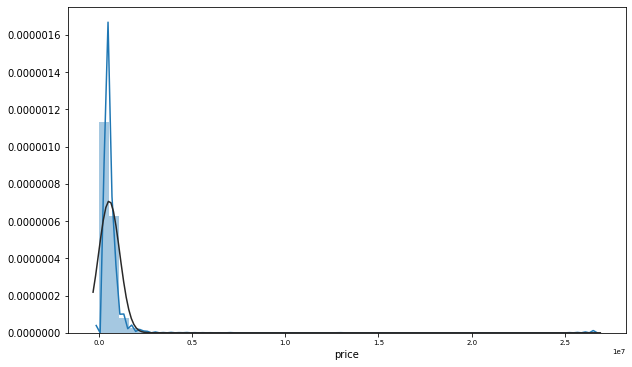

In [109]:
#looking at the price distribution of house
plt.figure(figsize = (10,6))
sns.distplot(df['price'], fit = norm)
#x-axis->price and y-axis-> probablity distribution

In [110]:
#In my opinion bigger houses demands more price, since sqft_living is a continuous data, so lets look at number of bedrooms and city
df.bedrooms.value_counts()
df.city.value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Kirkland                187
Issaquah                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
Vashon                   29
Tukwila                  29
SeaTac                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Fall City                11
Medina                   11
Black Diamond             9
Ravensdale                7
Pacific             

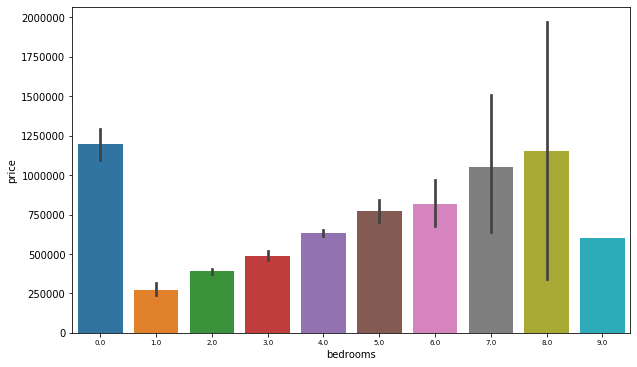

In [111]:
#plotting price distribution with respect to bedrooms and states
#using barplots
plt.figure(figsize = (10,6))
sns.barplot(x = df.bedrooms, y = df['price'])

In [112]:
#Anomalies: Price of 9 bedrooms is quite low, many houses have price as zero
#grouping wrt bedrooms and finding the min and max price
df.groupby(['bedrooms']).price.agg([len, min, max])

,len,min,max
bedrooms,,,
0.0,2.0,1095000.0,1295648.0
1.0,38.0,0.0,540000.0
2.0,566.0,0.0,1695000.0
3.0,2032.0,0.0,26590000.0
4.0,1531.0,0.0,4489000.0
5.0,353.0,0.0,7062500.0
6.0,61.0,0.0,3100000.0
7.0,14.0,280000.0,3200000.0
8.0,2.0,340000.0,1970000.0


In [113]:
#3 has a large outlier, 2 houses have 0 bedrooms, and few have price listed as zero
alpha = df[df.price == 0]
print(str(len(alpha)))
#we will remove the house with large outliers, 0 bedrooms and 0 price
#number of houses with 7, 8, 9 bedrooms are very less, so lets merge them with 6

49


In [115]:
house = df[(df['price']<1.5*10**7) & (df['price']>0) & (df.bedrooms)>0]
house['bedrooms'].replace([7,8,9],6, inplace = True)

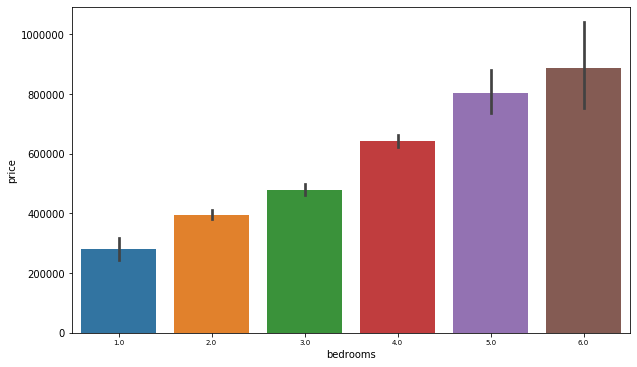

In [116]:
#plotting price distribution with respect to bedrooms and states
#using barplots
plt.figure(figsize = (10,6))
sns.barplot(x = house.bedrooms, y = house['price'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text xticklabel objects>)

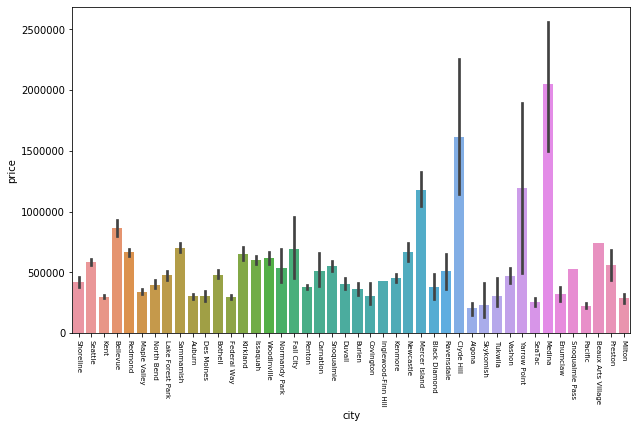

In [117]:
#plotting price distribution with respect to bedrooms and states
#using barplots
plt.figure(figsize = (10,6))
sns.barplot(x = house.city, y = house['price'])
plt.xticks(rotation = -90)

In [118]:
plt.figure(figsize = (10,6), dpi = 1200)
sns.barplot(x = house.statezip, y = house['price'], ci = None)
plt.xticks(rotation = -90)
plt.rc('xtick', labelsize=7)

In [131]:
#we will convert year renovated into 0 and 1
house['yr_renovated'] = house.apply(
    lambda row: 1 if (row['yr_renovated']>0) else row['yr_renovated'],
    axis=1
)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [132]:
house['yr_renovated'].fillna(0, inplace = False)

0       1
1       0
2       0
3       0
4       1
       ..
4595    1
4596    1
4597    0
4598    0
4599    0
Name: yr_renovated, Length: 4548, dtype: int64

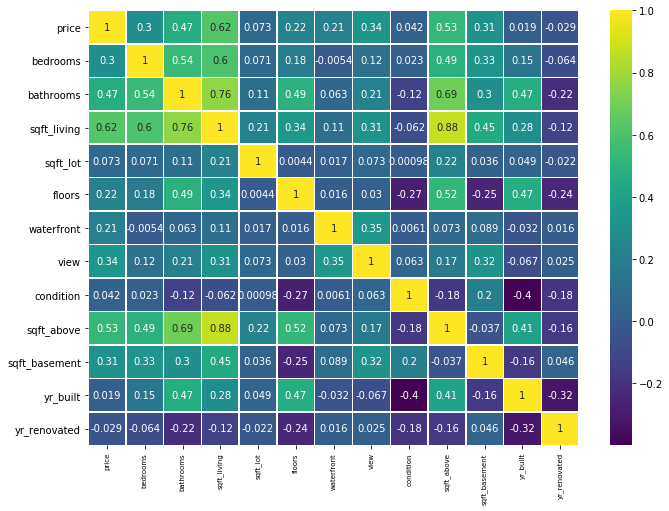

In [134]:
#plotting a heatmap to define correlation
f, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(house.corr(), annot = True, linewidths=.5, ax=ax, cmap = 'viridis')

0       1
1       0
2       0
3       0
4       1
       ..
4595    1
4596    1
4597    0
4598    0
4599    0
Name: yr_renovated, Length: 4548, dtype: int64

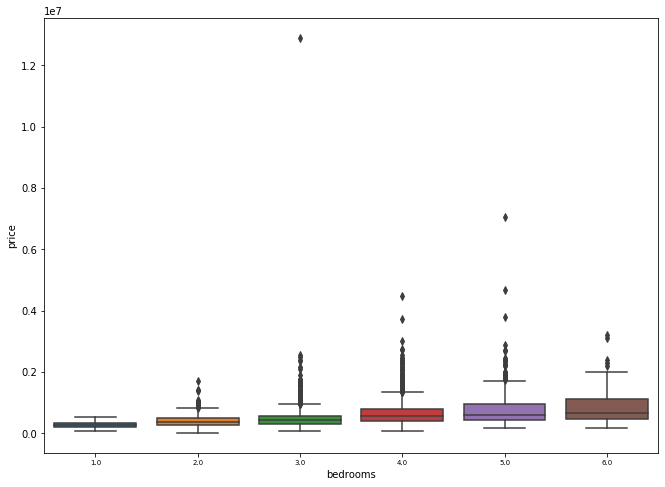

In [135]:
f, ax = plt.subplots(figsize=(11, 8))
box1 = sns.boxplot(x = 'bedrooms', y= 'price', data = house)

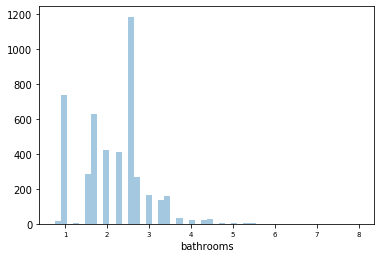

In [74]:
sns.distplot(house['bathrooms'], kde = False)

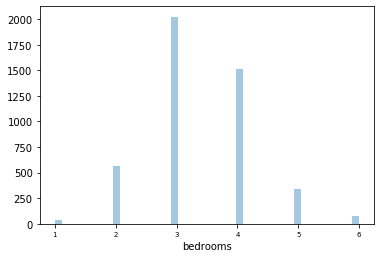

In [75]:
sns.distplot(house['bedrooms'], kde = False)

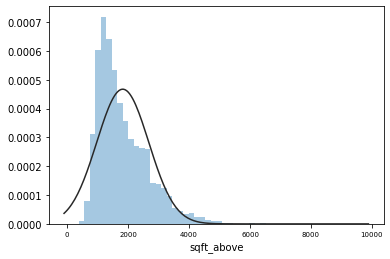

In [76]:
sns.distplot(house['sqft_above'], kde = False, fit = norm)

In [139]:
#extracting numerical values
house_num = house.select_dtypes(include = ['float64', 'int64'])

In [146]:
house_num.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.548000e+03,4548.000000,4548.000000,4548.000000,4.548000e+03,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000
mean,5.519017e+05,3.391601,2.156003,2131.788039,1.483615e+04,1.511763,0.006596,0.234389,3.449428,1821.432938,310.355101,1970.782542,0.405233
std,4.110606e+05,0.884781,0.775287,955.235720,3.597495e+04,0.537799,0.080958,0.765161,0.675267,853.333313,462.071292,29.765501,0.490991
min,7.800000e+03,1.000000,0.750000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.260750e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.572000e+05,4.000000,2.500000,2610.000000,1.097400e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1.000000
max,1.289900e+07,6.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,1.000000


In [147]:
Y = house_num.loc[:,['price']] #prices
X = house_num.drop(['price'], axis = 1) #features

In [148]:
# Initialise the Scaler 
scaler = preprocessing.RobustScaler()
# To scale data 
scaled_df = scaler.fit_transform(X)
X = pd.DataFrame(scaled_df, columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
                                              'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'])

In [149]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,0.0,-1.000000,-0.547826,0.038835,0.0,0.0,0.0,0.0,-0.225225,0.000000,-0.456522,1.0
1,2.0,0.333333,1.460870,0.229327,0.5,0.0,4.0,2.0,1.603604,0.466667,-1.195652,0.0
2,0.0,-0.333333,-0.034783,0.714262,-0.5,0.0,0.0,1.0,0.306306,0.000000,-0.217391,0.0
3,0.0,0.000000,0.026087,0.058587,-0.5,0.0,0.0,1.0,-0.531532,1.666667,-0.282609,0.0
4,1.0,0.333333,-0.026087,0.472046,-0.5,0.0,0.0,1.0,-0.405405,1.333333,0.000000,1.0


In [150]:
X['sqft_combined'] = (X['sqft_living']+X['sqft_above'])/(X['sqft_living']**2+X['sqft_above']**2)**0.5

In [155]:
X = X.drop(['sqft_living', 'sqft_above'], axis = 1)

In [156]:
X.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,sqft_combined
0,0.0,-1.000000,0.038835,0.0,0.0,0.0,0.0,0.000000,-0.456522,1.0,-1.305130
1,2.0,0.333333,0.229327,0.5,0.0,4.0,2.0,0.466667,-1.195652,0.0,1.412682
2,0.0,-0.333333,0.714262,-0.5,0.0,0.0,1.0,0.000000,-0.217391,0.0,0.880784
3,0.0,0.000000,0.058587,-0.5,0.0,0.0,1.0,1.666667,-0.282609,0.0,-0.949778
4,1.0,0.333333,0.472046,-0.5,0.0,0.0,1.0,1.333333,0.000000,1.0,-1.062151


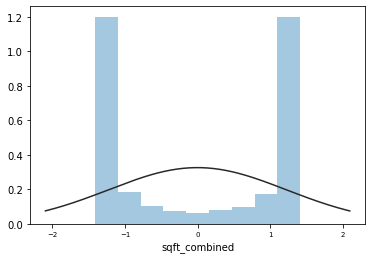

In [157]:
sns.distplot(X['sqft_combined'], kde = False, fit = norm)

In [160]:
mean_Y = Y.mean()
std_Y = Y.std()

In [161]:
scaled_df = scaler.fit_transform(Y)
Y = pd.DataFrame(scaled_df, columns = ['price'])

In [164]:
Y.describe()

,price
count,4548.000000
mean,0.262444
std,1.241406
min,-1.380747
25%,-0.419555
50%,0.000000
75%,0.580445
max,37.550774


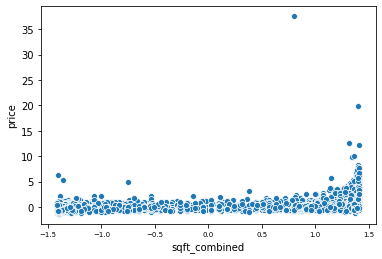

In [163]:
ax = sns.scatterplot(x=X['sqft_combined'], y=Y['price'])

In [167]:
# separate y and X into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, 
                                                    Y, 
                                                    test_size=0.3, 
                                                    random_state=42
                                                   )

In [170]:
#using a linear regression model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [171]:
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.358
Model:                            OLS   Adj. R-squared (uncentered):              0.356
Method:                 Least Squares   F-statistic:                              160.9
Date:                Sat, 27 Jun 2020   Prob (F-statistic):                   2.08e-295
Time:                        20:23:37   Log-Likelihood:                         -4719.7
No. Observations:                3183   AIC:                                      9461.
Df Residuals:                    3172   BIC:                                      9528.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------